# LAB | Feature Engineering

**Load the data**

In this challenge, we will be working with the same Spaceship Titanic data, like the previous Lab. The data can be found here:

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv

Metadata

https://github.com/data-bootcamp-v4/data/blob/main/spaceship_titanic.md

In [85]:
#Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [86]:
spaceship = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/spaceship_titanic.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


**Check the shape of your data**

In [87]:
spaceship.shape

(8693, 14)

**Check for data types**

In [88]:
spaceship.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

**Check for missing values**

In [89]:
spaceship.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

There are multiple strategies to handle missing data

- Removing all rows or all columns containing missing data.
- Filling all missing values with a value (mean in continouos or mode in categorical for example).
- Filling all missing values with an algorithm.

For this exercise, because we have such low amount of null values, we will drop rows containing any missing value. 

In [90]:
spaceship_clean=spaceship.dropna()
spaceship_clean.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

- **Cabin** is too granular - transform it in order to obtain {'A', 'B', 'C', 'D', 'E', 'F', 'G', 'T'}

In [91]:
spaceship_clean['Cabin'] = spaceship_clean['Cabin'].str[0]
spaceship_clean['Cabin']

C:\Users\sabri\AppData\Local\Temp\ipykernel_10588\3185131923.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean['Cabin'] = spaceship_clean['Cabin'].str[0]


0       B
1       F
2       A
3       A
4       F
       ..
8688    A
8689    G
8690    G
8691    E
8692    E
Name: Cabin, Length: 6606, dtype: object

- Drop PassengerId and Name

In [92]:
spaceship_clean.drop(columns=['PassengerId', 'Name'], inplace=True)

C:\Users\sabri\AppData\Local\Temp\ipykernel_10588\4283910768.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spaceship_clean.drop(columns=['PassengerId', 'Name'], inplace=True)


- For non-numerical columns, do dummies.

In [93]:
non_numerical_cols = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
# Apply one-hot encoding

spaceship_clean = pd.get_dummies(spaceship_clean, columns=non_numerical_cols, drop_first=True)

spaceship_clean

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39.0,0.0,0.0,0.0,0.0,0.0,False,True,False,False,True,False,False,False,False,False,False,False,True,False
1,24.0,109.0,9.0,25.0,549.0,44.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False
2,58.0,43.0,3576.0,0.0,6715.0,49.0,False,True,False,False,False,False,False,False,False,False,False,False,True,True
3,33.0,0.0,1283.0,371.0,3329.0,193.0,False,True,False,False,False,False,False,False,False,False,False,False,True,False
4,16.0,303.0,70.0,151.0,565.0,2.0,True,False,False,False,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41.0,0.0,6819.0,0.0,1643.0,74.0,False,True,False,False,False,False,False,False,False,False,False,False,False,True
8689,18.0,0.0,0.0,0.0,0.0,0.0,False,False,False,True,False,False,False,False,False,True,False,True,False,False
8690,26.0,0.0,0.0,1872.0,1.0,0.0,True,False,False,False,False,False,False,False,False,True,False,False,True,False
8691,32.0,0.0,1049.0,0.0,353.0,3235.0,False,True,False,False,False,False,False,True,False,False,False,False,False,False


In [94]:
spaceship_clean = spaceship_clean.astype(int)
spaceship_clean

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,HomePlanet_Europa,HomePlanet_Mars,CryoSleep_True,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,VIP_True
0,39,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
1,24,109,9,25,549,44,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,58,43,3576,0,6715,49,0,1,0,0,0,0,0,0,0,0,0,0,1,1
3,33,0,1283,371,3329,193,0,1,0,0,0,0,0,0,0,0,0,0,1,0
4,16,303,70,151,565,2,1,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,41,0,6819,0,1643,74,0,1,0,0,0,0,0,0,0,0,0,0,0,1
8689,18,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
8690,26,0,0,1872,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
8691,32,0,1049,0,353,3235,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [95]:
spaceship_clean.columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Transported', 'HomePlanet_Europa', 'HomePlanet_Mars', 'CryoSleep_True',
       'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E', 'Cabin_F', 'Cabin_G',
       'Cabin_T', 'Destination_PSO J318.5-22', 'Destination_TRAPPIST-1e',
       'VIP_True'],
      dtype='object')

**Perform Train Test Split**

In [96]:
X, y = spaceship_clean.drop(columns=['Transported']), spaceship_clean['Transported']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42
                                                    )
# we use the random state to make sure we select exactly the same rows

**Model Selection**

In this exercise we will be using **KNN** as our predictive model.

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
for k in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(f"k={k} → Accuracy: {accuracy_score(y_test, preds):.4f}")

k=1 → Accuracy: 0.7443
k=2 → Accuracy: 0.7564
k=3 → Accuracy: 0.7595
k=4 → Accuracy: 0.7542
k=5 → Accuracy: 0.7806
k=6 → Accuracy: 0.7769
k=7 → Accuracy: 0.7927
k=8 → Accuracy: 0.7867
k=9 → Accuracy: 0.8011
k=10 → Accuracy: 0.8011
k=11 → Accuracy: 0.7995
k=12 → Accuracy: 0.7973
k=13 → Accuracy: 0.7965
k=14 → Accuracy: 0.7973
k=15 → Accuracy: 0.7973
k=16 → Accuracy: 0.7965
k=17 → Accuracy: 0.8011
k=18 → Accuracy: 0.7965
k=19 → Accuracy: 0.7980
k=20 → Accuracy: 0.7943


In [98]:

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train) 


,n_neighbors,10
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


- Evaluate your model's performance. Comment it

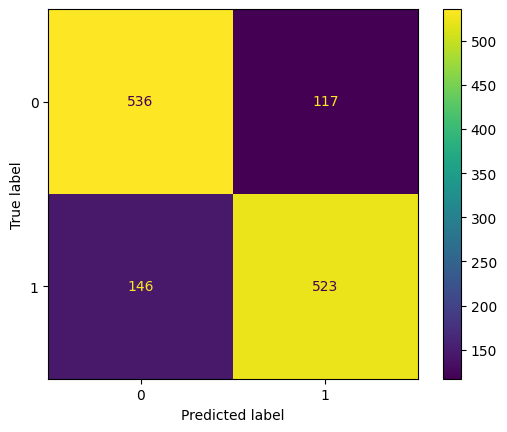

In [99]:
knn.predict(X_test) # predictions
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

confusion_matrix(y_true=y_test, y_pred=knn.predict(X_test))
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=knn.predict(X_test))

The confusion matrix provides a detailed breakdown of the model's classification performance:

- **True Positives**: 523 — correctly predicted transported passengers  

- **True Negatives**: 536 — correctly predicted non-transported passengers

- **False Positives**: 117 — incorrectly predicted as transported

- **False Negatives**: 146 — incorrectly predicted as non-transported

In [100]:
from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.79      0.82      0.80       653
           1       0.82      0.78      0.80       669

    accuracy                           0.80      1322
   macro avg       0.80      0.80      0.80      1322
weighted avg       0.80      0.80      0.80      1322



The model achieves an overall **accuracy of 80%**, indicating that 80% of predictions match the true labels on the test set.

#### Class 0 (Not Transported)

- **Precision: 0.79** → When the model predicts "not transported", it's correct 79% of the time.

- **Recall: 0.82** → It correctly identifies 82% of all actual "not transported" passengers.

- **F1-score: 0.80** → Balanced measure of precision and recall.

#### Class 1 (Transported)

- **Precision: 0.82** → When the model predicts "transported", it's correct 82% of the time.

- **Recall: 0.78** → It captures 78% of all actual "transported" passengers.

- **F1-score: 0.80** → Balanced performance for this class as well.
